# Data Extraction Notebook

"""
This notebook performs extraction, cleaning, and transformation of health insurance data.

Workflow:
- Load raw insurance data
- Analyze and clean data (remove duplicates, handle missing values)
- Encode categorical variables and create new features
- Save cleaned dataset for further analysis and visualization
"""

## Objectives
    
To Analyse the database to determine what part do various factor play in the make up of costs:
* Principally to determine how big a factor BMI, categorised according to recognised levels ( [AmericanCancerSociety](https://www.cancer.org/cancer/risk-prevention/diet-physical-activity/body-weight-and-cancer-risk/body-mass-index-bmi-calculator.html)), and if costs increase dramatically with level of BMI (obesity)
* To determine how big a factor smoking and age are on costs in comparison to BMI
* Are there multiplier effects - e.g. a combination of high BMI, smoking and age 
* What part to secondary factors such as region and sex play in overall costs


### Initial Objectives
*  Fetch raw data file from [Kaggle](https://www.kaggle.com/datasets/willianoliveiragibin/healthcare-insurance)
*  Analyse raw data to determine requirements for cleaning and transformation
*  Create new CSV file with cleaned and transformed data

## Inputs

*  The insurance.csv file downloaded from the above source and stored in the Datasets/Raw folder

## Outputs

* A new dataset csv with cleaned and transformed data, with some basic visualisations of data using Matplotlib

## Additional Comments

* If you have any additional comments that don't fit in the previous bullets, please state them here. 



---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'c:\\Users\\mikee\\Desktop\\Projects_Python\\HealthInsuranceAnalysis\\jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir


'c:\\Users\\mikee\\Desktop\\Projects_Python\\HealthInsuranceAnalysis'

# Analyse Raw Data

Import Packages and Load Insurance.csv

In [4]:
#import statements
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

---

In [5]:
#load raw insurance data
raw_df = pd.read_csv('Datasets/Raw/insurance.csv')
raw_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Begin initial analysis of data to determine further actions

In [6]:
#Check data info
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
#check for missing values
raw_df.isnull().sum()


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
raw_df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [9]:
#check for duplicates
raw_df.duplicated().value_counts()

False    1337
True        1
Name: count, dtype: int64

In [10]:
#show duplicates
raw_df[raw_df.duplicated()]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [11]:
##drop single duplicated value - to keep the first occurrence
raw_df.drop_duplicates(inplace=True)
raw_df


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


As there are no null values, proceed to analyse data to see which transformation are necessary.

# Data Transformation

Basic Visualisations to guide process of transformation

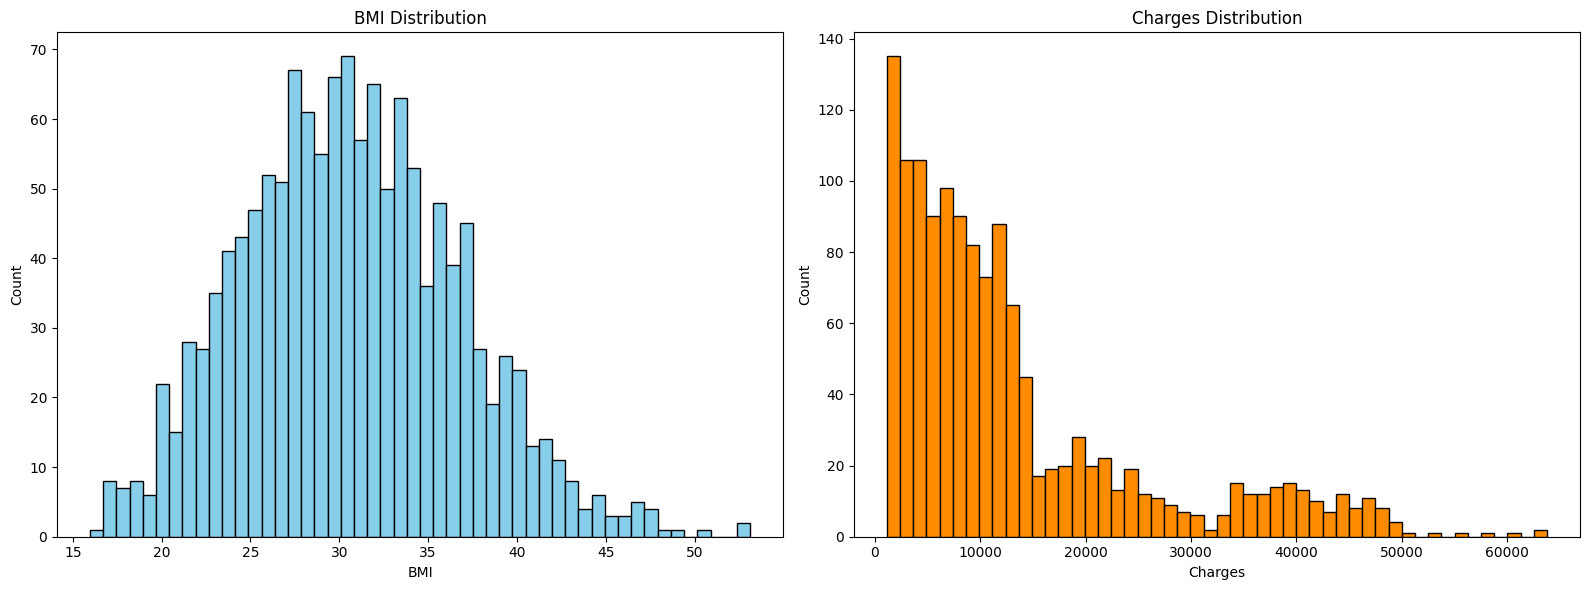

In [12]:
# Recreate histogram of BMI and charges using matplotlib
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(16, 6))
axes[0].hist(raw_df['bmi'], bins=50, color='skyblue', edgecolor='black')
axes[0].set_title('BMI Distribution')
axes[0].set_xlabel('BMI')
axes[0].set_ylabel('Count')

axes[1].hist(raw_df['charges'], bins=50, color='darkorange', edgecolor='black')
axes[1].set_title('Charges Distribution')
axes[1].set_xlabel('Charges')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

### Analysis of bmi and charges data
As these are the areas of most interest to this project I will add columns to the data showing these as categories.
For the bmi I have used information from [AmericanCancerSociety](https://www.cancer.org/cancer/risk-prevention/diet-physical-activity/body-weight-and-cancer-risk/body-mass-index-bmi-calculator.html) as a guide to categorization (NHS guidelines are slighly different). The categories for bmi classification are:
*   Underweight: BMI is less than 18.5
*   Normal weight: BMI is 18.5 to 24.9
*   Overweight: BMI is 25 to 29.9
*   Obesity: BMI is 30 or more

For charges data I have used the data from the survey to classify as follows:
*   0-15000  low
*   15000-30000 medium
*   30000-50000 high
*   0ver 50000 very high (I decided to add this category as there are a number of outliers over 50000)

In [13]:
##functions for encoding bmi and price data
def encode_bmi(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi < 25:
        return 'Healthy'
    elif 25 <= bmi < 30:
        return 'Overweight'
    else:
        return 'Obese'

def encode_charges(charges):
    if charges < 10000:
        return 'Low'
    elif 10000 <= charges < 20000:
        return 'Medium'
    elif 20000 <= charges < 30000:
        return 'High'
    else:
        return 'Very High'


In [14]:
##apply encoding functions - as these are applied to columns have used apply instead of pipe
raw_df['bmi_category'] = raw_df['bmi'].apply(encode_bmi)
raw_df['charges_category'] = raw_df['charges'].apply(encode_charges)
raw_df.head()


,age,sex,bmi,children,smoker,region,charges,bmi_category,charges_category
0,19,female,27.900,0,yes,southwest,16884.92400,Overweight,Medium
1,18,male,33.770,1,no,southeast,1725.55230,Obese,Low
2,28,male,33.000,3,no,southeast,4449.46200,Obese,Low
3,33,male,22.705,0,no,northwest,21984.47061,Healthy,High
4,32,male,28.880,0,no,northwest,3866.85520,Overweight,Low


---

### Plot counts of new categories, bmi_category and charges_category

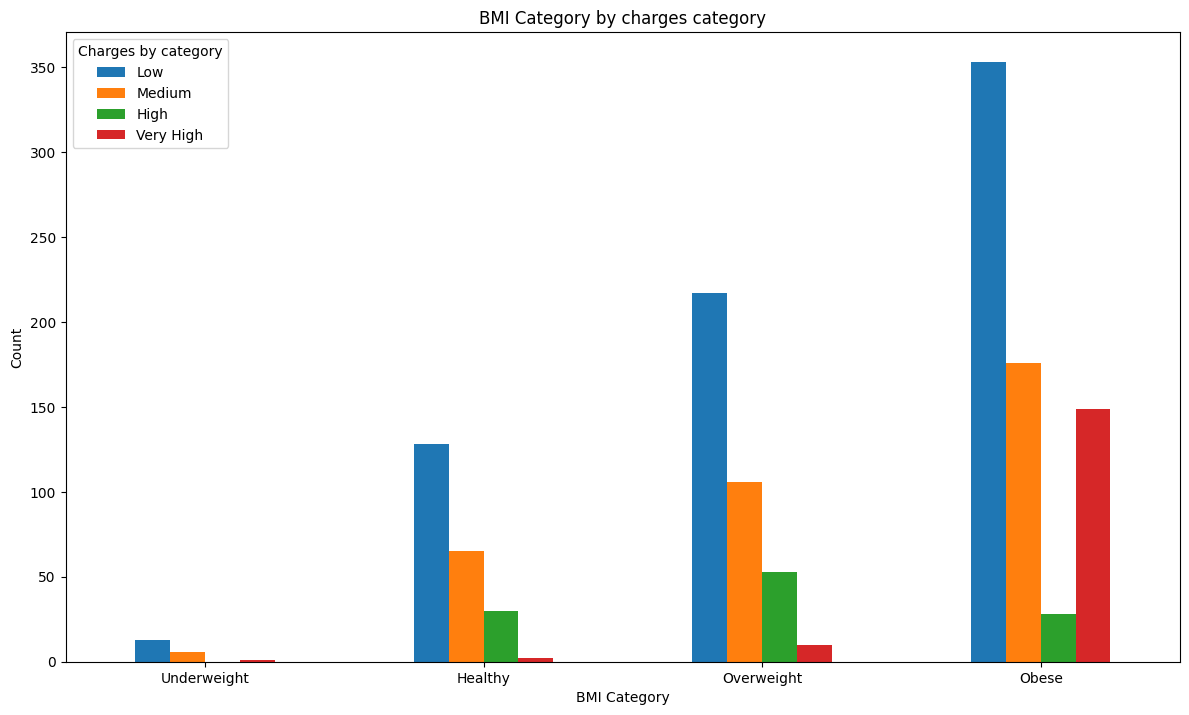

In [15]:
# Bar chart: charges_category against bmi_category with specified orders using matplotlib


bmi_order = ['Underweight', 'Healthy', 'Overweight', 'Obese']
charges_order = ['Low', 'Medium', 'High', 'Very High']

# Group and count
counts = raw_df.groupby(['bmi_category', 'charges_category']).size().unstack(fill_value=0).reindex(bmi_order)[charges_order]

ax = counts.plot(kind='bar', figsize=(12,8))
plt.title('BMI Category by charges category')
plt.xlabel('BMI Category')
plt.ylabel('Count')
plt.legend(title='Charges by category', loc='upper left')
plt.tight_layout()
plt.xticks(rotation=0)
plt.show()

As can be seen by the above chart, while charges are generally low across categories there is a significant increase in very high charges in the Obese category. 

## Encode remaining data

Sex, smoker and region and smoker values are all objects. Will encode as numerical or boolean values and either replace or add newly encoded data as columns.


In [16]:
#import feature-engine to encode data
from feature_engine.imputation import DropMissingData
from feature_engine.encoding import OrdinalEncoder
from feature_engine.selection import DropFeatures
from sklearn.pipeline import Pipeline

# Create a pipeline with the ordinal encoder to encode sex, smoker and region columns. Have included dropmissing data, as although there were no missing values in the dataset, it is a good practice to include it in the pipeline. dropped children column as not relevant to project.


pipeline = Pipeline(steps=[
    ('drop_na', DropMissingData() ),
    ('drop_children', DropFeatures(features_to_drop=['children'])),
    ('encoder', OrdinalEncoder(encoding_method='arbitrary', variables=['region']))
])
#Edited to remove smoker status and sex from transformation
#added drop children column as I will not be analysing this
# Fit the pipeline to the raw_df DataFrame

encoded_df = pipeline.fit_transform(raw_df) 
encoded_df.head()


c:\Users\mikee\Desktop\Projects_Python\HealthInsuranceAnalysis\.venv\Lib\site-packages\feature_engine\encoding\base_encoder.py:223: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(X[feature]):


,age,sex,bmi,smoker,region,charges,bmi_category,charges_category
0,19,female,27.900,yes,0,16884.92400,Overweight,Medium
1,18,male,33.770,no,1,1725.55230,Obese,Low
2,28,male,33.000,no,1,4449.46200,Obese,Low
3,33,male,22.705,no,2,21984.47061,Healthy,High
4,32,male,28.880,no,2,3866.85520,Overweight,Low


## Complete transformation stage and save cleaned data

This completes the cleaning and transformation stages. This may be revisited (for instance to add or re-encode columns)

NOTE

In [17]:
## save cleaned file to new csv in processed folder
encoded_df.to_csv('Datasets/processed/insurance_cleaned.csv', index=False)

*** Notes

* Some columns may be re-encoded or added for visualisation stage.


---

# Conclusions

* This dataset was relatively easy to clean and code, though this may need revisiting.
* My main analytic goal is to compare the influence of BMI in overall medical charges in comparison to other factors. Early analysis suggests there may be some, though it may not be the greatest factor in charges
* The next step is to look at how visualisations may be used to compare factors in health care charges